In [2]:
import matplotlib.pyplot as plt
from scipy import fftpack
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [3]:
filename = 'WapelloIA.1986.2021.txt'
df = pd.read_csv(
    filename,
    sep='\t',
    skiprows=33,
    header=None,
    names=['agency','id','datetime','timezone','flow','qcFlag']
)
df.drop(columns=['agency','id','timezone','qcFlag'],inplace=True)
df.replace('Ice',np.nan,inplace=True)
df.datetime = pd.to_datetime(df.datetime)
df.set_index('datetime',inplace=True)
print(df.head())
flow = list(df.flow.values)

C:\Users\Hail\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                      flow
datetime                  
1986-10-01 00:15:00  19300
1986-10-01 00:30:00  19400
1986-10-01 00:45:00  19400
1986-10-01 01:00:00  19400
1986-10-01 01:15:00  19400


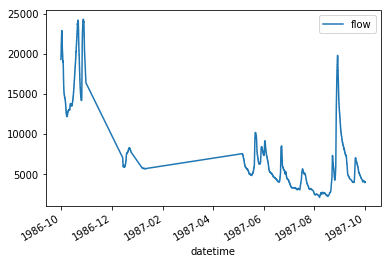

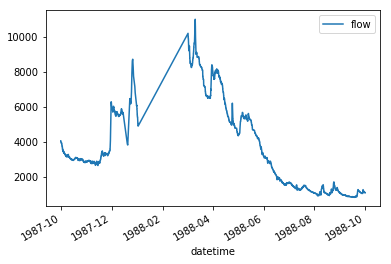

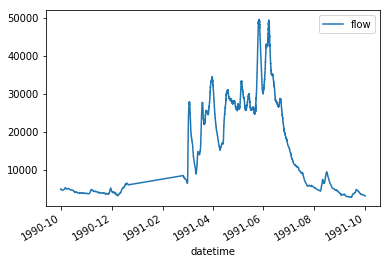

In [51]:
df.loc['1986-10-01 00:15':'1987-10-01 00:15'].plot()
df.loc['1987-10-01 00:15':'1988-10-01 00:15'].plot()
df.loc['1990-10-01 00:15':'1991-10-01 00:15'].plot()

<Figure size 720x720 with 0 Axes>

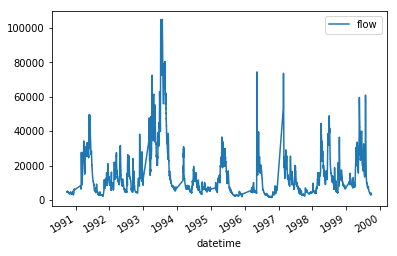

In [10]:
plt.figure(figsize=(10,10))
df.loc['1990-10-01 00:15':'1999-10-01 00:15'].plot()

In [24]:
flowft = np.fft.fft(flow[80000:120000])
# flowfreq = np.fft.fftfreq(flow)

C:\Users\Hail\Miniconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


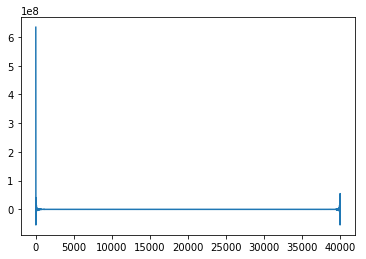

In [25]:
plt.plot(flowft)

C:\Users\Hail\Miniconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


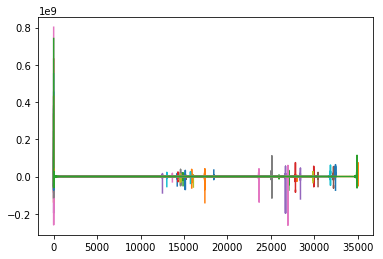

In [59]:
plt.figure()
for i in range(1986,2019):
    fft = np.fft.fft(df.loc['{0}-10-01 00:15'.format(i):'{0}-10-01 00:15'.format(i+1)].flow.values)
    plt.plot(fft)
    
plt.show()